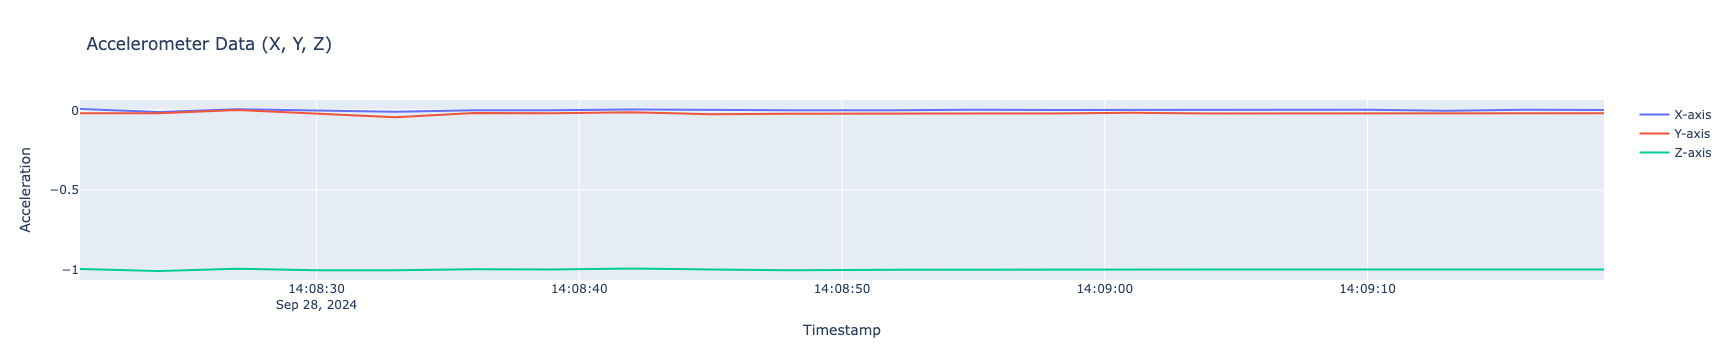

In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
import time
import os
from IPython.display import display, clear_output
from plotly.subplots import make_subplots

directory = './'  # Use the current directory

# Function to get the latest CSV file
def get_latest_csv(directory):
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
    if not csv_files:
        return None
    # Sort by modification date
    csv_files.sort(key=lambda f: os.path.getmtime(os.path.join(directory, f)), reverse=True)
    return csv_files[0]

# Store the latest processed file to check for changes
latest_csv = get_latest_csv(directory)

# Function to update the graph based on the latest CSV
def update_graph():
    global latest_csv
    new_latest_csv = get_latest_csv(directory)
    
    # Only update if a new file is detected
    if new_latest_csv and new_latest_csv != latest_csv:
        latest_csv = new_latest_csv
        print(f"Processing {latest_csv}")
        
        # Read the latest CSV file
        df = pd.read_csv(os.path.join(directory, latest_csv))

        # Create a new figure for the graph
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=df['timestamp'], y=df['py_x'], mode='lines', name='X-axis'))
        fig.add_trace(go.Scatter(x=df['timestamp'], y=df['py_y'], mode='lines', name='Y-axis'))
        fig.add_trace(go.Scatter(x=df['timestamp'], y=df['py_z'], mode='lines', name='Z-axis'))

        fig.update_layout(title='Accelerometer Data (X, Y, Z)',
                          xaxis_title='Timestamp',
                          yaxis_title='Acceleration')

        # Save the current graph with timestamp before updating
        timestamp = time.strftime("%Y%m%d-%H%M%S")
        fig.write_image(f"graph_{timestamp}.png")

        # Clear the output and display the updated graph in JupyterLab
        clear_output(wait=True)
        display(fig)  # Corrected for JupyterLab display

# Continuously check for a new CSV and update the graph if new data is available
try:
    while True:
        update_graph()
        time.sleep(2)  # Check every 2 seconds
except KeyboardInterrupt:
    print("Stopped graph update.")
